In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure


In [2]:
# Checking delta of stemming respected non stemming

with open("../../../data/5. Result Analysis/Stemming Analysis/performance_data.json", 'r') as file:
    data = json.load(file)

delta_scenario_type = {}
for i, model in enumerate(data.get("model")):
    all_scenario = data['model'][model]['scenario']
    scenario_type = []
    for i in range(3): # 3 type of scenario
        even = 2 * (i + 1)
        odd = 2 * (i + 1) - 1
        delta = all_scenario[f"{even}"] - all_scenario[f"{odd}"]
        delta = round(delta, 4)
        scenario_type.append(delta)
    delta_scenario_type[model] = scenario_type

print(delta_scenario_type)

{'fasttext': [-0.0052, -0.0079, -0.0053], 'cnn': [0.0, -0.0052, -0.0052], 'indobertweet': [0.0026, -0.0158, -0.0158]}


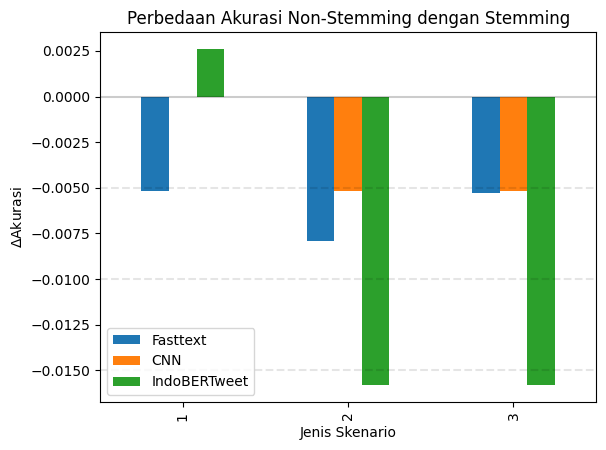

In [5]:
# Plotting Bahasa Indonesia
scenario_1 = ["1"] + [delta_scenario_type[model][0] for model in delta_scenario_type]
scenario_2 = ["2"] + [delta_scenario_type[model][1] for model in delta_scenario_type]
scenario_3 = ["3"] + [delta_scenario_type[model][2] for model in delta_scenario_type]

df = pd.DataFrame([scenario_1, scenario_2, scenario_3], columns=["Jenis Nomor Skenario", "Fasttext", "CNN", "IndoBERTweet"])

ax = df.plot.bar()
ax.axhline(y=0, color='black', alpha=0.2, linestyle='-')
ax.axhline(y=-5e-3, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-1e-2, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-15e-3, color='black', alpha=0.1, linestyle='--')
plt.xticks(range(len(df)),df['Jenis Nomor Skenario'])
plt.set_cmap('gray')
# plt.yscale('symlog')
plt.title("Perbedaan Akurasi Non-Stemming dengan Stemming")
plt.xlabel('Jenis Skenario')
plt.ylabel(r'$\Delta$' +  'Akurasi')
plt.savefig('Stemming Indonesia.svg', format='svg', bbox_inches="tight")
plt.show()

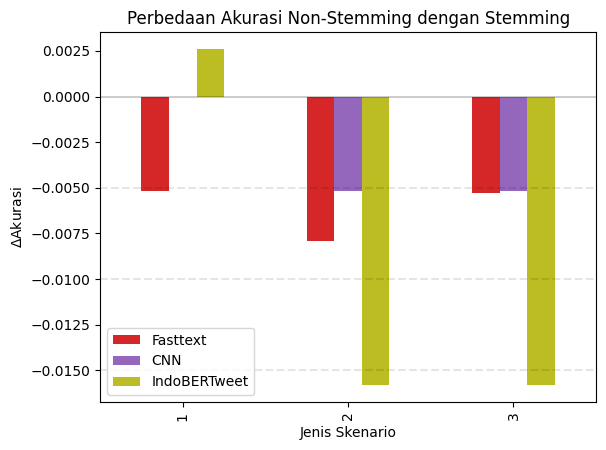

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

scenario_1 = ["1"] + [delta_scenario_type[model][0] for model in delta_scenario_type]
scenario_2 = ["2"] + [delta_scenario_type[model][1] for model in delta_scenario_type]
scenario_3 = ["3"] + [delta_scenario_type[model][2] for model in delta_scenario_type]

df = pd.DataFrame([scenario_1, scenario_2, scenario_3], columns=["Jenis Nomor Skenario", "Fasttext", "CNN", "IndoBERTweet"])

ax = df.plot.bar(color=['#d62728', '#9467bd', '#bcbd22'])

# Add hatch patterns to the bars for better visibility in black and white
# hatches = ['/', '\\', 'x']
# for i, bar in enumerate(ax.patches):
#     if i < 3:
#         bar.set_hatch(hatches[2])
#         continue
#     if i < 6:
#         bar.set_hatch(hatches[1])
#         continue
#     if i < 9:
#         bar.set_hatch(hatches[0])
#         continue

ax.axhline(y=0, color='black', alpha=0.2, linestyle='-')
ax.axhline(y=-5e-3, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-1e-2, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-15e-3, color='black', alpha=0.1, linestyle='--')

plt.xticks(range(len(df)), df['Jenis Nomor Skenario'])

# Add a legend
plt.legend()

plt.title("Perbedaan Akurasi Non-Stemming dengan Stemming")
plt.xlabel('Jenis Skenario')
plt.ylabel(r'$\Delta$Akurasi')

# Save the plot in SVG format
plt.savefig('Stemming Indonesia.svg', format='svg', bbox_inches="tight")
plt.show()


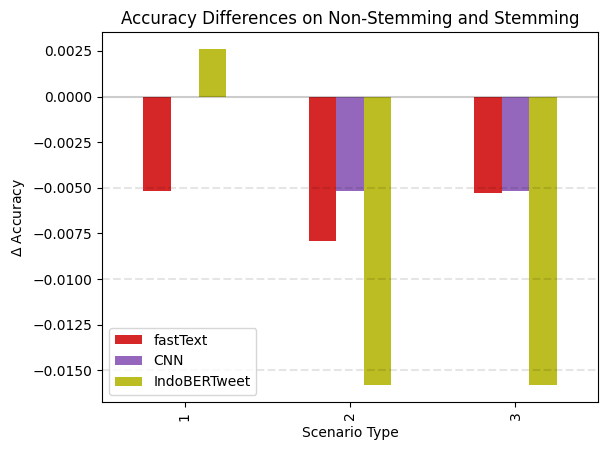

In [29]:
# Plotting English
scenario_1 = ["1"] + [delta_scenario_type[model][0] for model in delta_scenario_type]
scenario_2 = ["2"] + [delta_scenario_type[model][1] for model in delta_scenario_type]
scenario_3 = ["3"] + [delta_scenario_type[model][2] for model in delta_scenario_type]

df = pd.DataFrame([scenario_1, scenario_2, scenario_3], columns=["Jenis Nomor Skenario", "fastText", "CNN", "IndoBERTweet"])

ax = df.plot.bar(color=['#d62728', '#9467bd', '#bcbd22'])

plt.xticks(range(len(df)),df['Jenis Nomor Skenario'])
ax.axhline(y=0, color='black', alpha=0.2, linestyle='-')
ax.axhline(y=-5e-3, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-1e-2, color='black', alpha=0.1, linestyle='--')
ax.axhline(y=-15e-3, color='black', alpha=0.1, linestyle='--')
plt.title("Accuracy Differences on Non-Stemming and Stemming")
plt.xlabel('Scenario Type')
plt.ylabel(r'$\Delta$ Accuracy')
plt.savefig('Stemming English.svg', format='svg', bbox_inches="tight")
plt.show()